In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [3]:
submission = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
train.shape

(42000, 785)

In [4]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X, y  = train.iloc[:,1:], train['label']
print("X: ",X.shape)
print("y: ",y.shape)

X:  (42000, 784)
y:  (42000,)


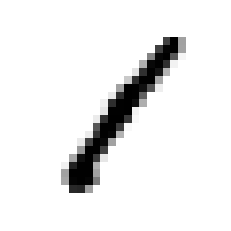

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X.iloc[:1]
some_digit_image = some_digit.to_numpy().reshape(28,28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [7]:
y[[0]]

0    1
Name: label, dtype: int64

In [8]:
y.astype(np.uint8)

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: uint8

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)    uj

In [10]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, plot_roc_curve

def CV_predict_probas(model,x_data,y_data):
    y_probas = cross_val_predict(model,
                     x_data,
                     y_data,
                     cv=5,
                     method="predict_proba")
    y_scores = y_probas[:,1]
    fpr, tpe, threshold = roc_curve(y,y_scores)
    plt.plot(fpr,tpr, "b:", label='SGD')
    plot_roc_curve(fpr,tpr)
    plt.legend(loc="lower right")
    plt.show()

In [11]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto", random_state=0)
svm_clf.fit(X.iloc[:1000], y.iloc[:1000]) 
svm_clf.predict(X.iloc[:1])

some_digit_scores = svm_clf.decision_function(X.iloc[:1])
some_digit_scores

array([[ 6.9184266 ,  9.29826742,  8.16111111,  0.78325538,  4.85578942,
        -0.22030293,  3.81612846,  5.88952375,  1.7953386 ,  2.81612846]])

In [12]:
from sklearn.ensemble import RandomForestClassifier

rfc_clf = RandomForestClassifier(random_state=0)
rfc_clf.fit(X.iloc[:1000], y.iloc[:1000]) 
rfc_clf.predict(X.iloc[:1])

some_digit_scores = rfc_clf.predict_proba(X.iloc[:1])
some_digit_scores

array([[0.  , 0.93, 0.01, 0.  , 0.  , 0.01, 0.02, 0.02, 0.01, 0.  ]])

In [13]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=0)
sgd_clf.fit(X.iloc[:1000], y.iloc[:1000]) 
sgd_clf.predict(X.iloc[:1])
print("Actual: ",y.iloc[:1])

some_digit_scores = sgd_clf.decision_function(X.iloc[:1])
some_digit_scores

Actual:  0    1
Name: label, dtype: int64


array([[-4852806.82069638,  2242383.84652352, -1768542.75045825,
         -859891.17654012, -3000038.33248608, -1342327.63339233,
        -4696228.92319047, -3998026.14298099, -1253820.5209673 ,
        -1533817.8191088 ]])

In [14]:
from sklearn.model_selection import cross_val_score
def Cross_Val_Score(model,x_data, y_data):
    scores = cross_val_score(model,
                     x_data,
                     y_data,
                     cv=3,
                     scoring="accuracy")
    return scores

In [15]:
from sklearn.preprocessing import StandardScaler
def Standard_Scaling(x_data):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(x_data.astype(np.float64))
    return X_scaled

In [16]:
X_scaled = Standard_Scaling(X)
models_lst = [svm_clf,rfc_clf, sgd_clf]
for model in models_lst:
    print("Model: ",model, " ",Cross_Val_Score(model,X_scaled, y))

Model:  SVC(gamma='auto', random_state=0)   [0.95457143 0.95578571 0.95835714]
Model:  RandomForestClassifier(random_state=0)   [0.96078571 0.96207143 0.9645    ]


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


Model:  SGDClassifier(random_state=0)   [0.90842857 0.90771429 0.90621429]


In [19]:
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(rfc_clf,X_scaled, y,cv=3)
conf_matrix = confusion_matrix(y, y_train_pred)
conf_matrix

array([[4072,    0,    4,    2,    5,    4,   16,    2,   26,    1],
       [   0, 4613,   24,   13,    7,    5,    5,    6,    7,    4],
       [  18,   11, 4026,   16,   22,    4,   10,   38,   25,    7],
       [   9,    8,   67, 4104,    3,   56,    6,   29,   47,   22],
       [   8,    6,   10,    0, 3929,    2,   21,    8,   13,   75],
       [  17,    6,    5,   62,    7, 3626,   27,    2,   24,   19],
       [  21,    7,    2,    0,    8,   30, 4055,    0,   14,    0],
       [   4,   19,   54,    6,   27,    1,    0, 4219,    8,   63],
       [   7,   25,   20,   44,   20,   34,   22,    6, 3836,   49],
       [  20,   10,    9,   54,   60,   15,    4,   38,   35, 3943]])

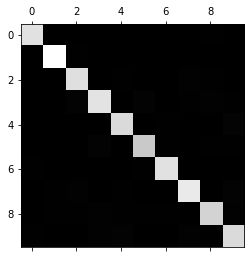

In [23]:
plt.matshow(conf_matrix, cmap=plt.cm.gray)
plt.show()

In [27]:
row_sums = conf_matrix.sum(axis=1, keepdims=True)
norm_conf_mx = conf_matrix / row_sums

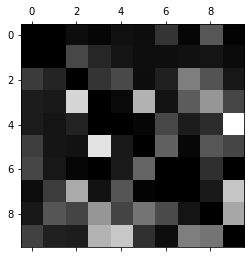

In [29]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()